# Technical Analysis with Pandas ([pandas_ta](https://github.com/twopirllc/pandas-ta))
* Below contains examples of simple charts that can be made from pandas_ta indicators
* Examples below are for **educational purposes only**

In [1]:
%matplotlib inline
import datetime
import matplotlib.pyplot as plt
import pandas as pd
import pandas_ta as ta

from alphaVantageAPI.alphavantage import AlphaVantage  # pip install alphaVantage-api

e = pd.DataFrame()

### List of Indicators (post an [issue](https://github.com/twopirllc/pandas-ta/issues) if the indicator doc needs updating)

In [2]:
e.ta.indicators()

pandas.ta - Technical Analysis Indicators
Total Indicators: 89
Abbreviations:
    accbands, ad, adosc, adx, amat, ao, aobv, apo, aroon, atr, bbands, bop, cci, cg, cmf, cmo, coppock, cross, decreasing, dema, donchian, dpo, efi, ema, eom, fisher, fwma, hl2, hlc3, hma, ichimoku, increasing, kama, kc, kst, kurtosis, linear_decay, linreg, log_return, long_run, macd, mad, massi, median, mfi, midpoint, midprice, mom, natr, nvi, obv, ohlc4, percent_return, ppo, pvi, pvol, pvt, pwma, qstick, quantile, rma, roc, rsi, rvi, short_run, sinwma, skew, slope, sma, stdev, stoch, swma, t3, tema, trend_return, trima, trix, true_range, tsi, uo, variance, vortex, vp, vwap, vwma, willr, wma, zlma, zscore


### Individual Indicator help

In [3]:
help(ta.sma)

Help on function sma in module pandas_ta.overlap.sma:

sma(close, length=None, offset=None, **kwargs)
    Simple Moving Average (SMA)
    
    The Simple Moving Average is the classic moving average that is the equally
    weighted average over n periods.
    
    Sources:
        https://www.tradingtechnologies.com/help/x-study/technical-indicator-definitions/simple-moving-average-sma/
    
    Calculation:
        Default Inputs:
            length=10
        SMA = SUM(close, length) / length
    
    Args:
        close (pd.Series): Series of 'close's
        length (int): It's period.  Default: 10
        offset (int): How many periods to offset the result.  Default: 0
    
    Kwargs:
        adjust (bool): Default: True
        presma (bool, optional): If True, uses SMA for initial value.
        fillna (value, optional): pd.DataFrame.fillna(value)
        fill_method (value, optional): Type of fill method
    
    Returns:
        pd.Series: New feature generated.



### Load Daily SPY from [AlphaVantage](http://www.alphavantage.com) and clean it

In [4]:
def farm(ticker = 'SPY', drop=['dividend', 'split_coefficient']):
    AV = AlphaVantage(api_key="YOUR API KEY", premium=False, clean=True, output_size='full')
    df = AV.data(symbol=ticker, function='D')
    df.set_index(['date'], inplace=True)
    df.drop(['dividend', 'split_coefficient'], axis=1, inplace=True) if 'dividend' in df.columns and 'split_coefficient' in df.columns else None
    df.name = ticker
    return df

def ctitle(indicator_name, ticker='SPY', length=100):
    return f"{ticker}: {indicator_name} from {recent_startdate} to {recent_startdate} ({length})"

### Initialization

In [5]:
price_size = (16, 8)
ind_size = (16, 2)
ticker = 'SPY'
recent = 126
half_of_recent = int(0.5 * recent)

### Get Ticker and take a peek

In [7]:
df = farm(ticker)
last_ = df.shape[0]
recent_startdate = df.tail(recent).index[0]
recent_enddate = df.tail(recent).index[-1]
print(f"{df.name}{df.shape} from {recent_startdate} to {recent_enddate}\n{df.describe()}")
df.head()

SPY(5429, 5) from 2019-01-31 to 2019-07-31
              open         high          low        close        volume
count  5429.000000  5429.000000  5429.000000  5429.000000  5.429000e+03
mean    151.389190   152.276947   150.386328   151.380314  1.032063e+08
std      53.421581    53.473198    53.361804    53.433329  9.946794e+07
min      67.950000    70.000000    67.100000    68.110000  6.790000e+04
25%     114.100000   114.850000   113.300000   114.100000  3.570580e+07
50%     132.990000   133.796800   131.970000   133.040000  7.503440e+07
75%     184.850000   186.120000   183.900000   184.970000  1.434282e+08
max     301.880000   302.230000   300.850000   302.010000  8.708580e+08


,open,high,low,close,volume
date,,,,,
1998-01-02,97.3125,97.6562,96.5312,97.5625,2360900.0
1998-01-05,97.8437,98.4375,96.7812,97.7812,4191800.0
1998-01-06,97.2500,97.2812,96.1875,96.2187,3154900.0
1998-01-07,96.0937,96.7187,95.2187,96.4687,4424200.0
1998-01-08,96.3125,96.3125,95.3750,95.6250,3831000.0


### Aliases

In [8]:
opendf = df['open']
closedf = df['close']
volumedf = df['volume']

## Create some constants for some indicators

In [9]:
help(df.ta.constants) # for more info
df.ta.constants(True, -4, 4)
df.tail()

Help on method constants in module pandas_ta.core:

constants(apply, lower_bound=-100, upper_bound=100, every=1) method of pandas_ta.core.AnalysisIndicators instance
    Constants
    
    Useful for indicator levels or if you need some constant value.
    
    Add constant '1' to the DataFrame
    >>> df.ta.constants(True, 1, 1, 1)
    Remove constant '1' to the DataFrame
    >>> df.ta.constants(False, 1, 1, 1)
    
    Adding constants that range of constants from -4 to 4 inclusive
    >>> df.ta.constants(True, -4, 4, 1)
    Removing constants that range of constants from -4 to 4 inclusive
    >>> df.ta.constants(False, -4, 4, 1)
    
    Args:
        apply (bool): Default: None.  If True, appends the range of constants to the
            working DataFrame.  If False, it removes the constant range from the working
            DataFrame.
        lower_bound (int): Default: -100.  Lowest integer for the constant range.
        upper_bound (int): Default: 100.  Largest integer for the 

,open,high,low,close,volume,-4,-3,-2,-1,0,1,2,3,4
date,,,,,,,,,,,,,,
2019-07-25,300.94,301.00,299.11,300.00,55394074.0,-4,-3,-2,-1,0,1,2,3,4
2019-07-26,300.76,302.23,300.62,302.01,45084077.0,-4,-3,-2,-1,0,1,2,3,4
2019-07-29,301.88,301.93,300.85,301.46,38126462.0,-4,-3,-2,-1,0,1,2,3,4
2019-07-30,299.91,301.17,299.49,300.72,45274977.0,-4,-3,-2,-1,0,1,2,3,4
2019-07-31,300.99,301.06,300.30,300.80,9400827.0,-4,-3,-2,-1,0,1,2,3,4


## Price & Volume Charts with Moving Averages

In [10]:
def cscheme(colors):
    aliases = {
        'BkBu': ['black', 'blue'],
        'gr': ['green', 'red'],
        'grays': ['silver', 'gray'],
        'mas': ['black', 'green', 'orange', 'red'],
    }
    aliases['default'] = aliases['gr']
    return aliases[colors]

def machart(kind, fast, medium, slow, append=True, last=last_, figsize=price_size, colors=cscheme('mas')):
    title = ctitle(f"{kind.upper()}s", ticker=ticker, length=last)
    ma1 = df.ta(kind=kind, length=fast, append=append)
    ma2 = df.ta(kind=kind, length=medium, append=append)
    ma3 = df.ta(kind=kind, length=slow, append=append)
    
    madf = pd.concat([closedf, df[[ma1.name, ma2.name, ma3.name]]], axis=1, sort=False).tail(last)
    madf.plot(figsize=figsize, title=title, color=colors, grid=True)    

def volumechart(kind, length=10, last=last_, figsize=ind_size, alpha=0.7, colors=cscheme('gr')):
    title = ctitle("Volume", ticker=ticker, length=last)
    volume = pd.DataFrame({'V+': volumedf[closedf > opendf], 'V-': volumedf[closedf < opendf]}).tail(last)
    
    volume.plot(kind='bar', figsize=figsize, width=0.5, color=colors, alpha=alpha, stacked=True)
    vadf = df.ta(kind=kind, close=volumedf, length=length).tail(last)
    vadf.plot(figsize=figsize, lw=1.4, color='black', title=title, rot=45, grid=True)

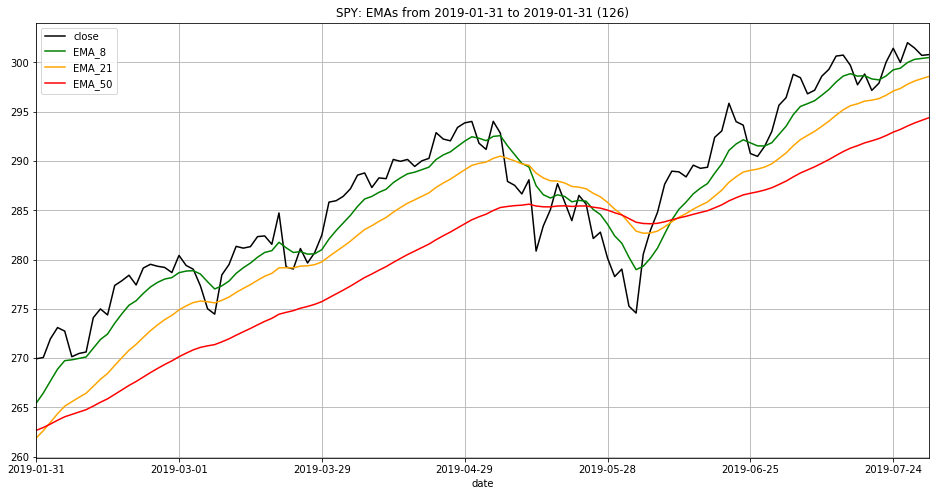

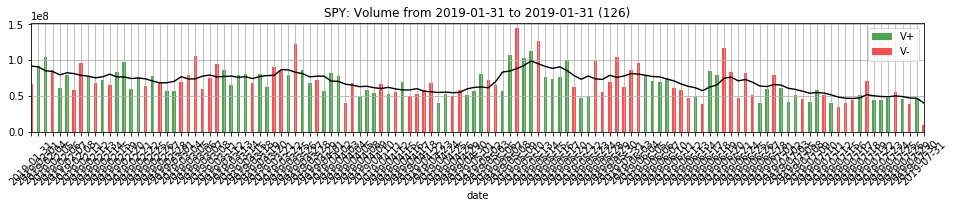

In [11]:
machart('ema', 8, 21, 50, last=recent)
volumechart('ema', last=recent)

## Indicator Examples
* Examples of simple and complex indicators.  Most indicators return a Series, while a few return DataFrames.
* All indicators can be called one of three ways. Either way, they return the result.

### Three ways to use pandas_ta
1. Stand Alone like TA-Lib  ta.**indicator**(*kwargs*).
2. As a DataFrame Extension like df.ta.**indicator**(*kwargs*).  Where df is a DataFrame with columns named 'open', 'high', 'low', 'close, 'volume' for simplicity.
3. Similar to #2, but by calling: df.ta(kind='**indicator**', *kwargs*).

### Cumulative Log Return

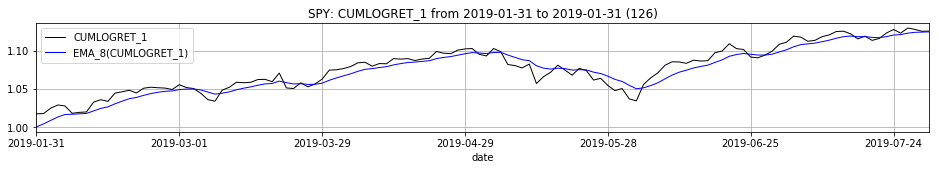

In [12]:
clr_ma_length = 8
clrdf = df.ta.log_return(cumulative=True, append=True)
clrmadf = ta.ema(clrdf, length=clr_ma_length)
qqdf = pd.DataFrame({f"{clrdf.name}": clrdf, f"{clrmadf.name}({clrdf.name})": clrmadf})
qqdf.tail(recent).plot(figsize=ind_size, color=cscheme('BkBu'), linewidth=1, title=ctitle(clrdf.name, ticker=ticker, length=recent), grid=True)

### MACD

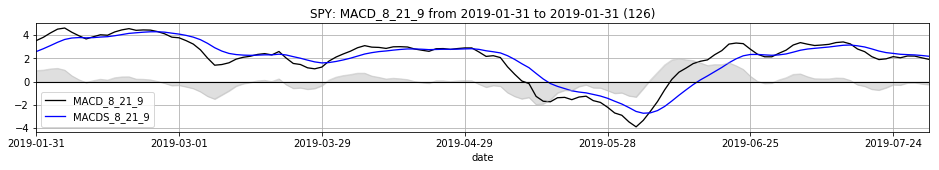

In [13]:
macddf = df.ta.macd(fast=8, slow=21, signal=9, min_periods=None, append=True)
macddf[[macddf.columns[0], macddf.columns[2]]].tail(recent).plot(figsize=(16, 2), color=cscheme('BkBu'), linewidth=1.3)
macddf[macddf.columns[1]].tail(recent).plot.area(figsize=ind_size, stacked=False, color=['silver'], linewidth=1, title=ctitle(macddf.name, ticker=ticker, length=recent), grid=True).axhline(y=0, color="black", lw=1.1)

### ZScore

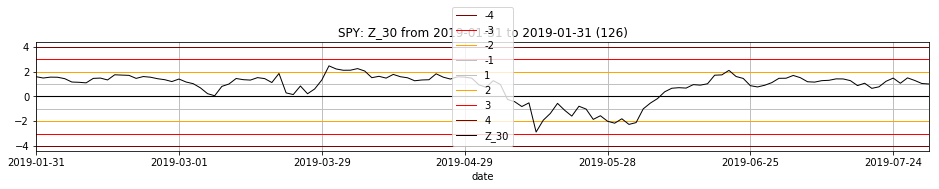

In [14]:
zscoredf = df.ta.zscore(length=30, append=True)
zcolors = ['maroon', 'red', 'orange', 'silver', 'silver', 'orange', 'red', 'maroon', 'black', 'blue']
zcols = df[['-4', '-3', '-2', '-1', '1', '2', '3', '4', zscoredf.name]].tail(recent)
zcols.plot(figsize=ind_size, color=zcolors, linewidth=1, title=ctitle(zscoredf.name, ticker=ticker, length=recent), grid=True).axhline(y=0, color="black", lw=1.1)

# New Features
### Archer Moving Averages Trends
Archer Moving Average Trends (__amat__) returns the long and short run trends of fast and slow moving averages.

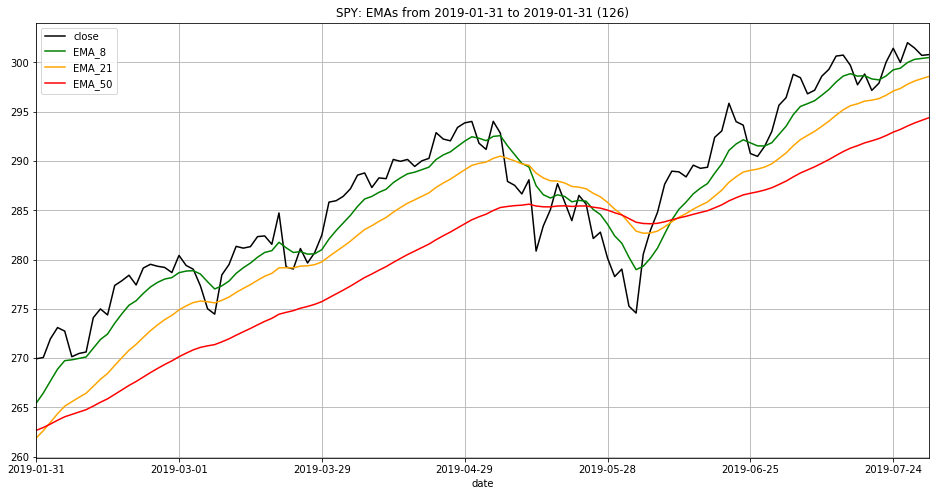

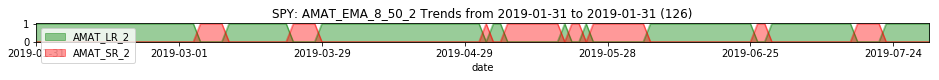

In [15]:
matype = 'ema'
fast_length = 8
medfast_length = 21
slow_length = 50

amat = df.ta.amat(mamode=matype, fast=fast_length, slow=slow_length)
machart(matype, fast_length, medfast_length, slow_length, last=recent) # Price Chart so we can see the association with AMAT
amat.tail(recent).plot(kind='area', figsize=(16, 0.35), color=cscheme('gr'), alpha=0.4, stacked=False, title=ctitle(f"{amat.name} Trends", ticker=ticker, length=recent))

### Archer On Balance Volume
Archer On Balance Volume (__aobv__) returns a DataFrame of OBV, OBV min and max, fast and slow MAs of OBV, and the long and short run trends of the two OBV MAs.

In [16]:
matype = 'sma'
fast_length = 10
medfast_length = 20
slow_length = 50

aobvdf = ta.aobv(close=closedf, volume=volumedf, mamode=matype, fast=fast_length, slow=medfast_length)
aobv_colors = ['black', 'silver', 'silver', 'green', 'red']
aobv_trenddf = aobvdf[aobvdf.columns[-2:]]
aobv_trenddf.name = f"{aobvdf.name} Trends"

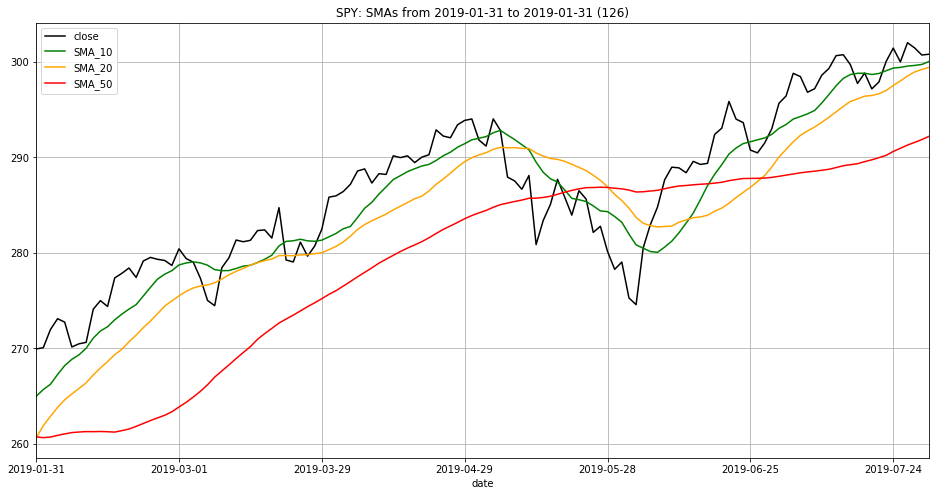

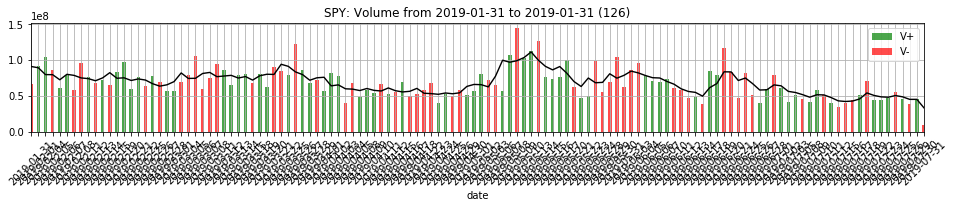

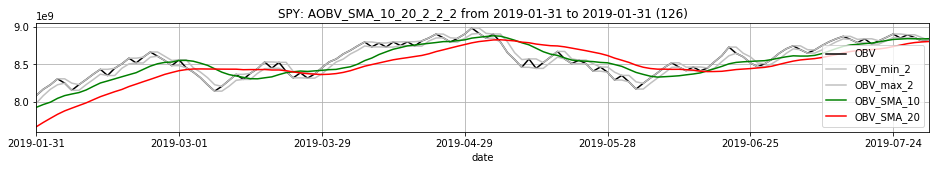

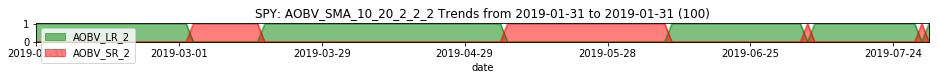

In [17]:
machart(matype, fast_length, medfast_length, slow_length, last=recent) # Price Chart so we can see the association with AOBV
volumechart('ema', length=5, last=recent)
aobvdf[aobvdf.columns[:5]].tail(recent).plot(figsize=ind_size, color=aobv_colors, title=ctitle(aobvdf.name, ticker=ticker, length=recent), grid=True)
aobv_trenddf.tail(recent).plot(kind='area', figsize=(16, 0.35), color=cscheme('gr'), alpha=0.5, title=ctitle(aobv_trenddf.name), stacked=False)

### Long Run and Short Run
Long Run (__long_run__) returns 1 if fast and slow averages approach each other from the below or both are increasing.  Otherwise returns zero.

Conversely, Short Run (__short_run__) returns 1 if fast and slow averages approach each other from above or both are decreasing.  Otherwise returns 0.

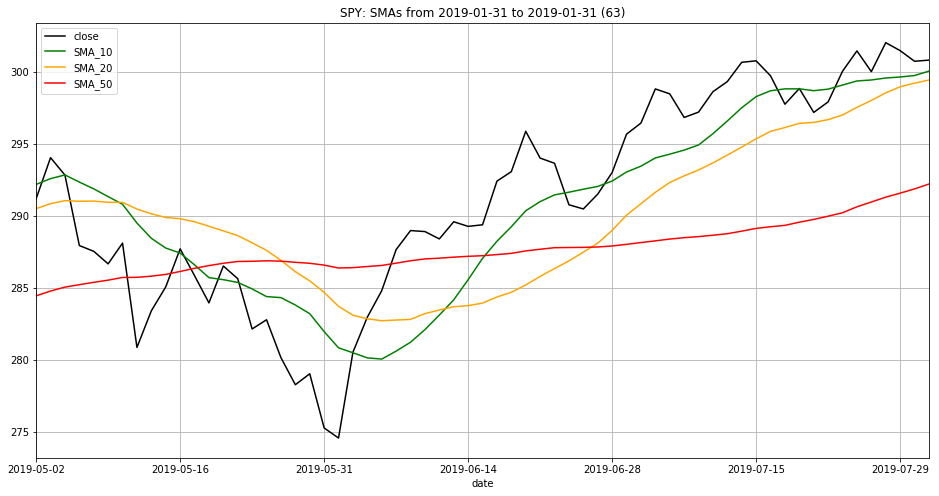

In [18]:
matype = 'sma'
fast_length = 10
medfast_length = 20
slow_length = 50

machart(matype, fast_length, medfast_length, slow_length, last=half_of_recent)

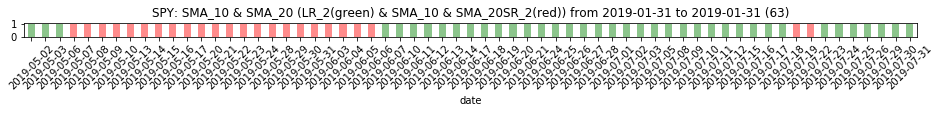

In [19]:
maf = df.ta(kind=matype, length=fast_length)
mam = df.ta(kind=matype, length=medfast_length)
lrun = df.ta.long_run(maf, mam, append=False)  # Long Run of Fast MA and Slow MA
srun = df.ta.short_run(maf, mam, append=False) # Short Run of Fast MA and Slow MA
                   
srun.tail(half_of_recent).plot(kind='bar', figsize=(16,0.25), color=['red'], linewidth=1, alpha=0.45, rot=45)
lrun.tail(half_of_recent).plot(kind='bar', figsize=(16,0.25), color=['green'], linewidth=1, alpha=0.45, title=ctitle(f"{maf.name} & {mam.name} ({lrun.name}(green) & {maf.name} & {mam.name}{srun.name}(red))", length=half_of_recent), rot=45)

### Cross
Cross (__cross__) returns 1 if two series cross and 0 if they do not.  By default, above=True.

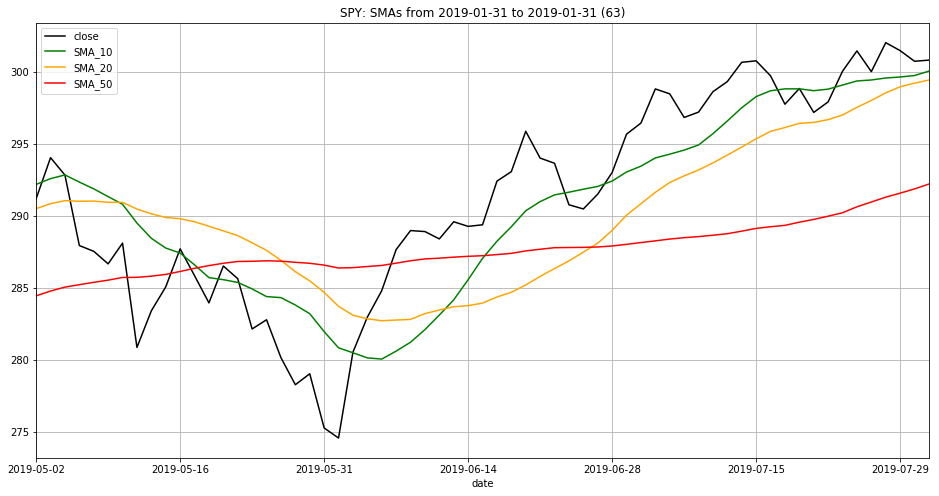

In [20]:
machart(matype, fast_length, medfast_length, slow_length, last=half_of_recent)

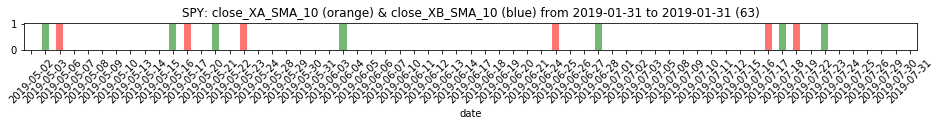

In [21]:
maf = df.ta(kind=matype, length=fast_length)
cross_above = ta.cross(closedf, maf, above=True)
cross_above.tail(int(0.5 * recent)).plot(kind='bar', figsize=(16, 0.5), color=['green'], linewidth=1, alpha=0.55, stacked=False, rot=45)

cross_below = ta.cross(closedf, maf, above=False)
cross_below.tail(int(0.5 * recent)).plot(kind='bar', figsize=(16, 0.5), color=['red'], linewidth=1, alpha=0.55, stacked=False, title=ctitle(f"{cross_above.name} (orange) & {cross_below.name} (blue)", length=int(0.5 * recent)), rot=45)

In [22]:
def recent_crosses(series, **kwargs):
    last = kwargs.pop('last', 5)
    return list(series[series > 0].tail(last).index[::-1])

last_n_crosses = 5
recent_crosses_above = recent_crosses(cross_above, last=last_n_crosses)
recent_crosses_below = recent_crosses(cross_below, last=last_n_crosses)

print(f"Most recent {cross_above.name} Dates:\n    {', '.join(recent_crosses_above)}")
print(f"Most recent {cross_below.name} Dates:\n    {', '.join(recent_crosses_below)}")

Most recent close_XA_SMA_10 Dates:
    2019-07-23, 2019-07-18, 2019-06-28, 2019-06-04, 2019-05-21
Most recent close_XB_SMA_10 Dates:
    2019-07-19, 2019-07-17, 2019-06-25, 2019-05-23, 2019-05-17


### Trend Return
* Trend Return (__trend_return__) calculates the cumulative log returns from a specified trend.
* There is no limit on how to construct a trend.  It can be as simple as: close > SMA(close, 50).

In [27]:
def simple_ma_strategies(kind, fast, slow, cumulative=True, last=last_, figsize=(16, 2), colors=cscheme('default'), alpha=0.35):
    """A very basic long/short cumulative log return model proof of concept (NOT A STRATEGY RECOMMENDATION)"""
    title = ctitle(f"{'Cumulative ' if cumulative else ''}Trend Returns of {kind.upper()}s")
    last = last if last is not None else df.shape[0]
    closedf = df['close']
    maf = df.ta(kind=kind, length=fast)
    mas = df.ta(kind=kind, length=slow)
    
    def ma_return_name(name):
        return f"{name} {' Cumulative' if cumulative else ''} Trend Return"
    
    # Trade Logic
    long = (closedf > maf) & (maf > mas)
    short = ~long
    cum_long_return = ta.trend_return(closedf, long, cumulative=cumulative)
    cum_short_return = ta.trend_return(closedf, short, cumulative=cumulative)
    
    tdf = pd.DataFrame({
        ma_return_name(f"long: {maf.name} > {mas.name}"): cum_long_return,
        ma_return_name(f"short: {maf.name} < {mas.name}"): cum_short_return,
    })
    tdf.set_index(closedf.index, inplace=True)
    window = tdf.tail(last)
    window.plot(kind='area', figsize=figsize, color=colors, linewidth=1, alpha=alpha, title=title, stacked=False, grid=True).axhline(y=0, color="black", lw=1.1)

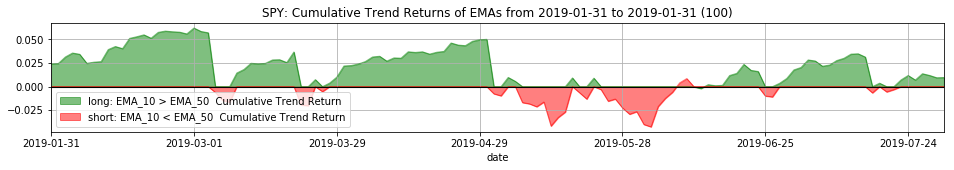

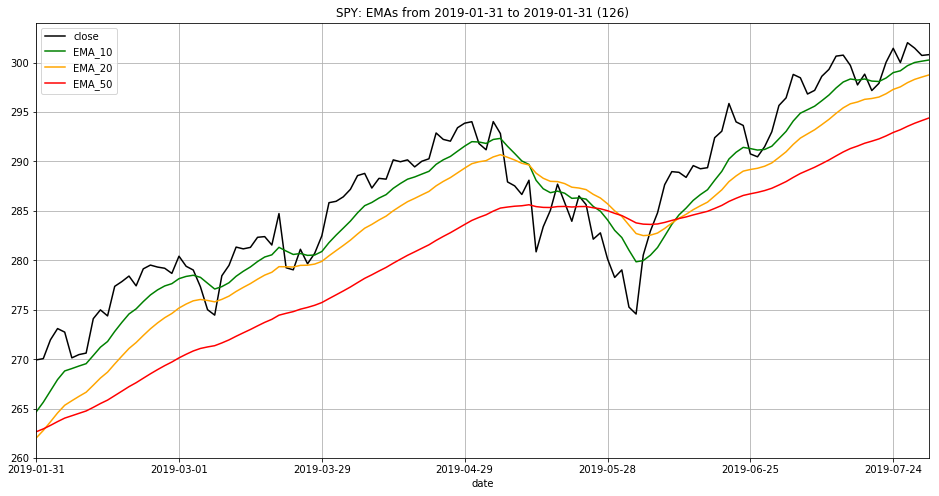

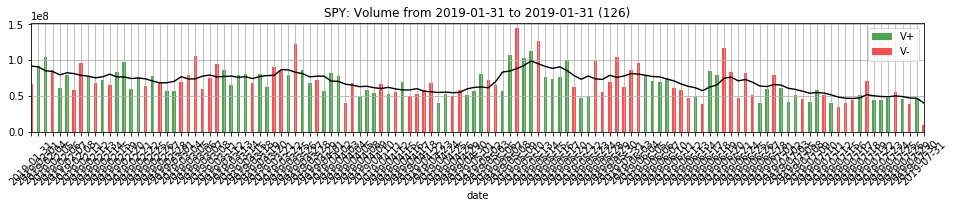

In [26]:
matype = 'ema'
fast_length = 10
medfast_length = 20
slow_length = 50

simple_ma_strategies(matype, fast=fast_length, slow=slow_length, last=recent, colors=cscheme('gr'), alpha=0.5)
machart(matype, fast_length, medfast_length, slow_length, last=recent)
volumechart(matype, last=recent)

# Disclaimer
* All investments involve risk, and the past performance of a security, industry, sector, market, financial product, trading strategy, or individual’s trading does not guarantee future results or returns. Investors are fully responsible for any investment decisions they make. Such decisions should be based solely on an evaluation of their financial circumstances, investment objectives, risk tolerance, and liquidity needs.

* Any opinions, news, research, analyses, prices, or other information offered is provided as general market commentary, and does not constitute investment advice. I will not accept liability for any loss or damage, including without limitation any loss of profit, which may arise directly or indirectly from use of or reliance on such information.